In [10]:
import pandas as pd
pd.set_option('display.max_column',30)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pylab import rcParams ##matplotlib
rcParams['figure.figsize'] = 12, 8

In [4]:
train = pd.read_csv('data/first_round_training_data.csv')[['Parameter'+str(i) for i in range(1,11)]+['Quality_label']]
test = pd.read_csv('data/first_round_testing_data.csv')


In [5]:
train.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,Pass
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,Fail
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail


## Label Distribution

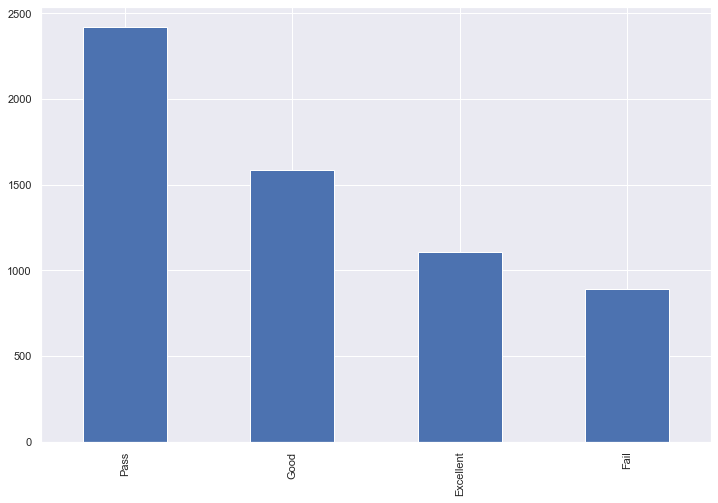

In [185]:
train['Quality_label'].value_counts().plot(kind='bar')

In [6]:
train['label'] = train['Quality_label'].map({
    'Excellent':1,
    'Good':2,
    'Pass':3,
    'Fail':4
})

In [188]:
train.describe()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,label
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6000.000000
mean,485.198954,1.952379e+03,406.348529,189.205842,5.868163e+00,5.598597e+00,272.300821,22.133231,5.823664e+04,35.902066,2.515667
std,11401.971393,5.419588e+04,12018.898941,2621.779049,8.631865e+00,7.686898e+00,2027.460514,302.172768,3.173068e+06,101.629348,0.957205
min,0.000003,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04,0.001024,1.000000
25%,0.088221,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01,0.101478,2.000000
50%,1.050304,9.405962e-01,1.044908,1.068467,2.225808e+00,2.684398e+00,0.600827,2.931083,5.930812e-01,0.727611,3.000000
75%,10.938565,1.569199e+01,10.665397,9.902064,6.680183e+00,7.117767e+00,2.374035,17.850021,6.783967e+00,13.969790,3.000000
max,713682.207601,3.034568e+06,864530.632179,139767.494732,8.367195e+01,4.117541e+01,35698.591553,20086.397753,1.738083e+08,517.197610,4.000000


## `Correlation`

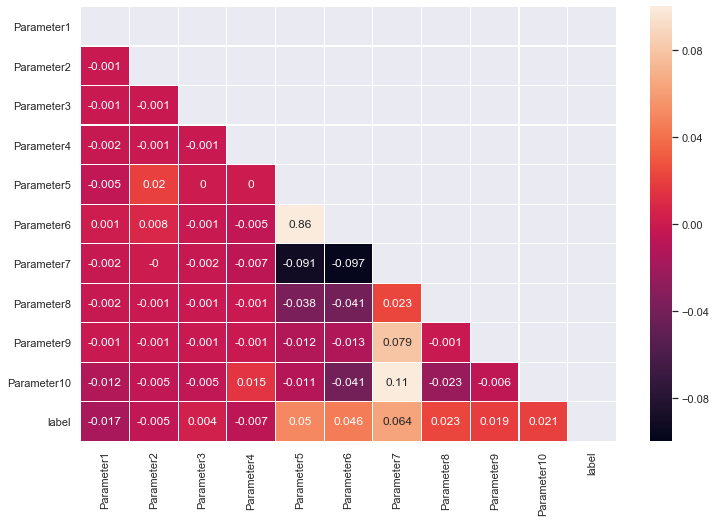

In [189]:
plt.figure(figsize=(12,8))
correlation = train.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=correlation.round(3),mask=mask,vmin=-0.1,vmax=0.1,annot=True, linewidths=.1)

## 判断是否是类别变量

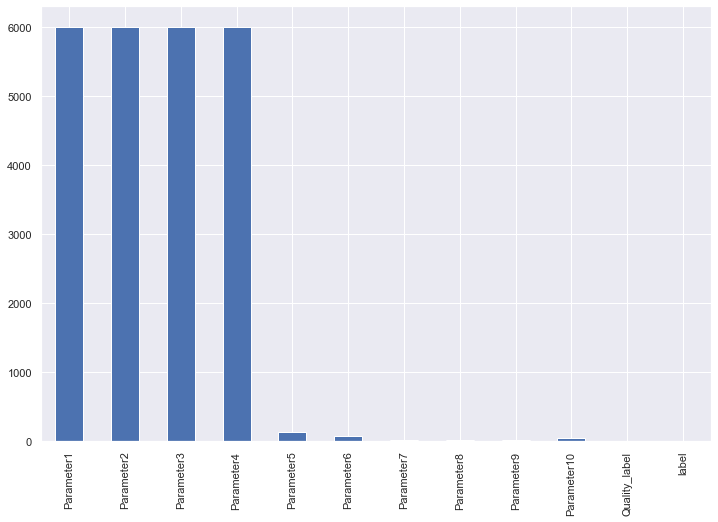

In [11]:
train.nunique().plot(kind='bar')

## `Parameter` 与 `label`

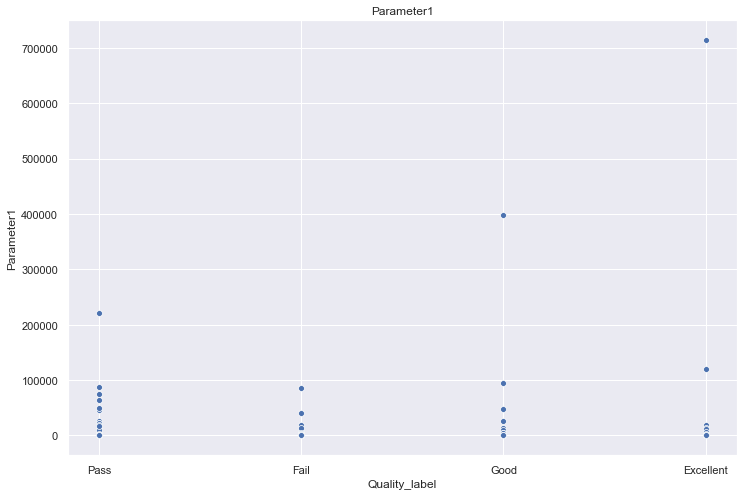

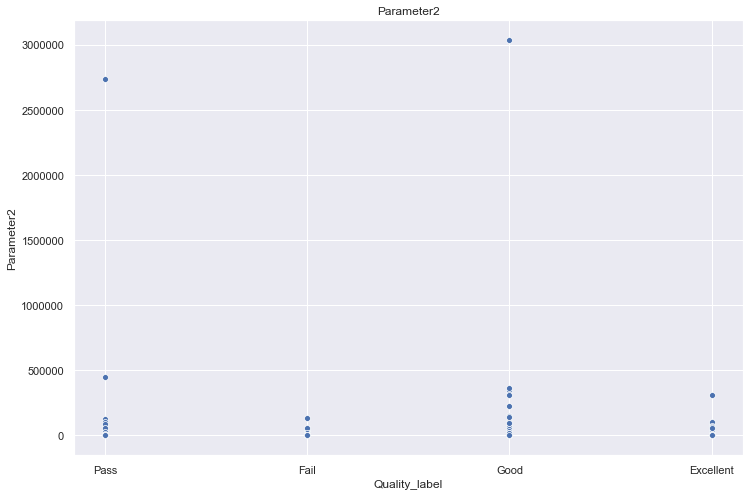

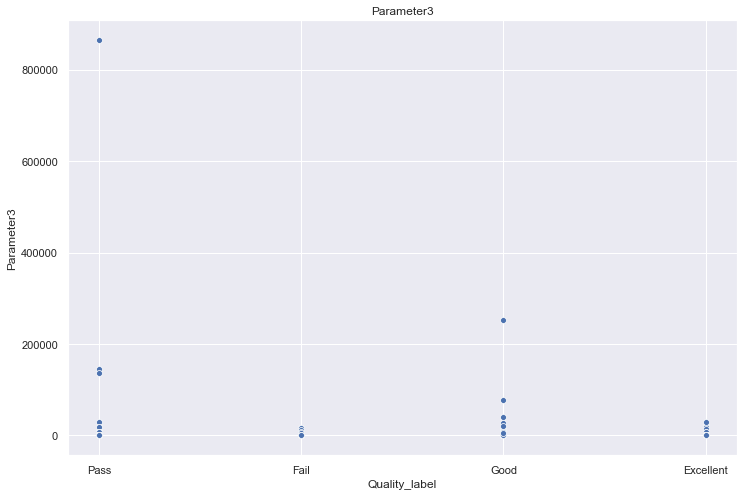

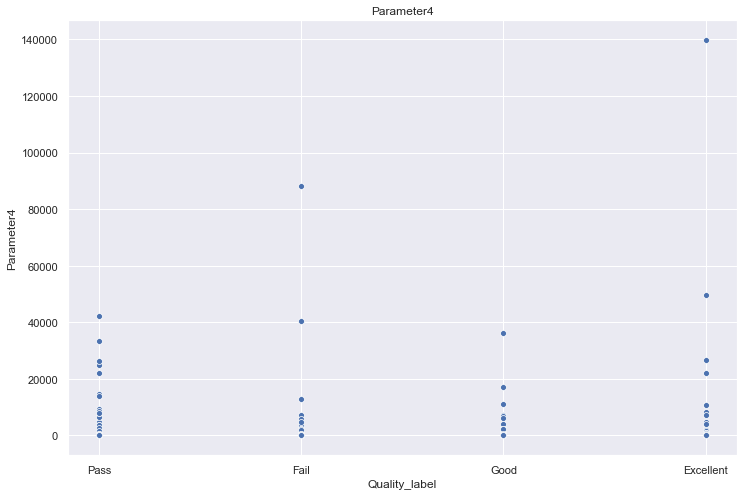

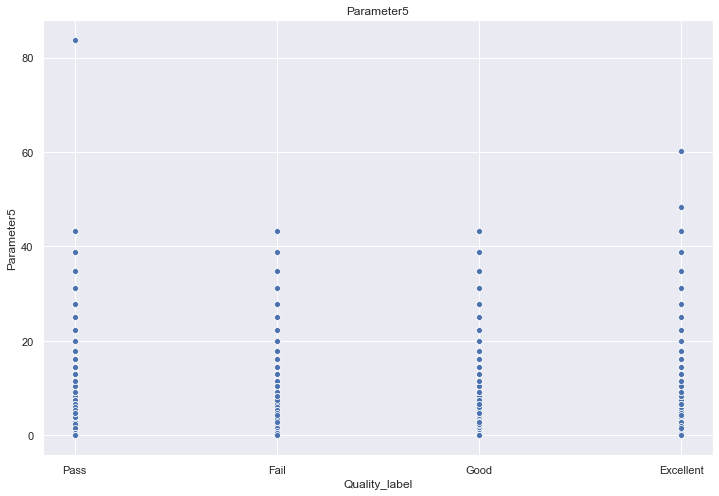

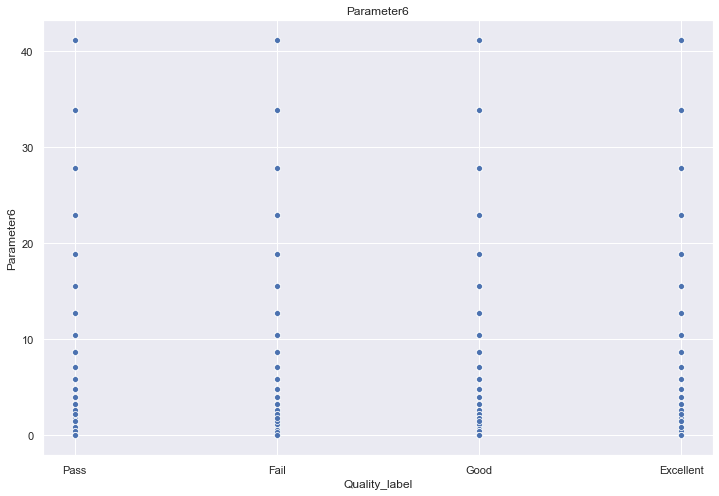

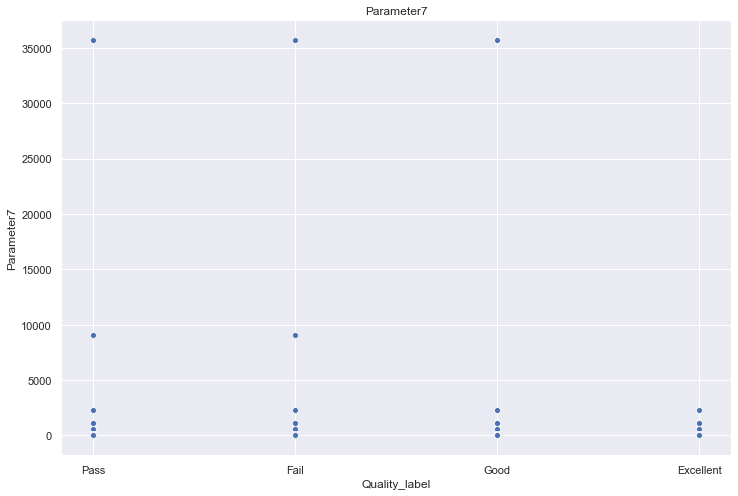

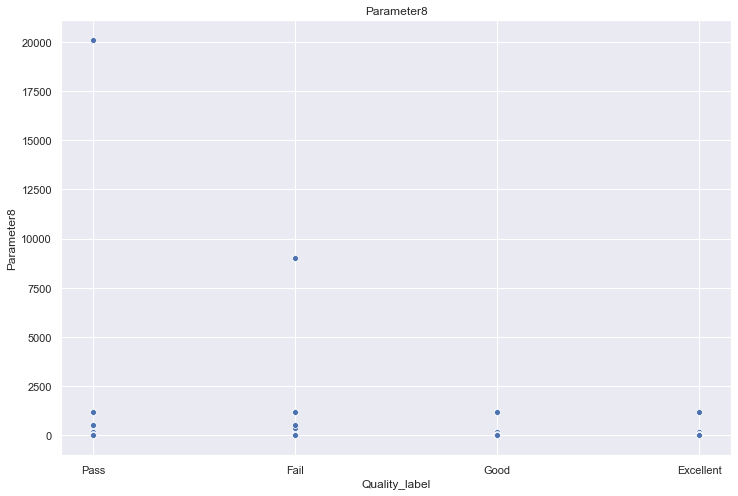

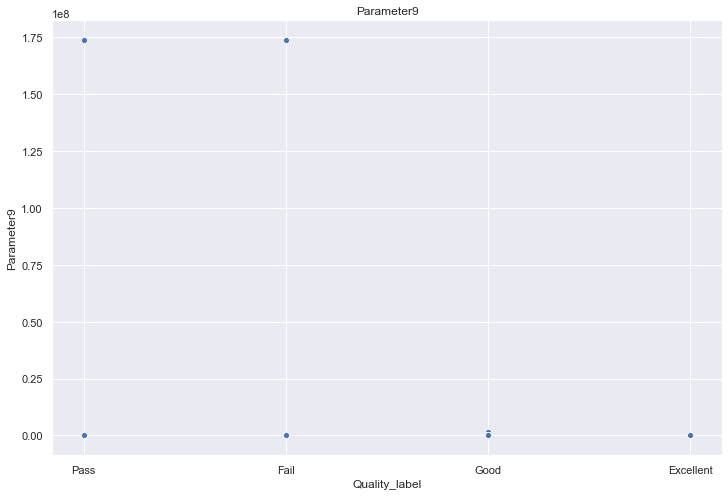

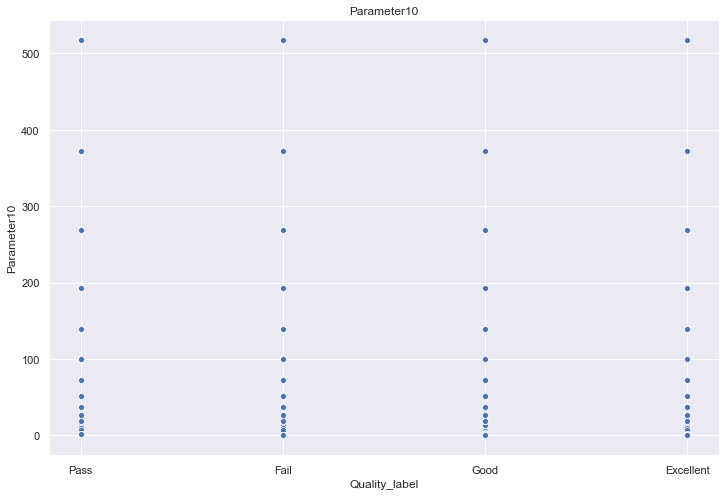

In [57]:
for i in ['Parameter'+str(i) for i in range(1,11)]:
    sns.scatterplot(x='Quality_label', y=i, data=train)
    plt.title(i)
    plt.show()

## 训练集和测试集分布比较

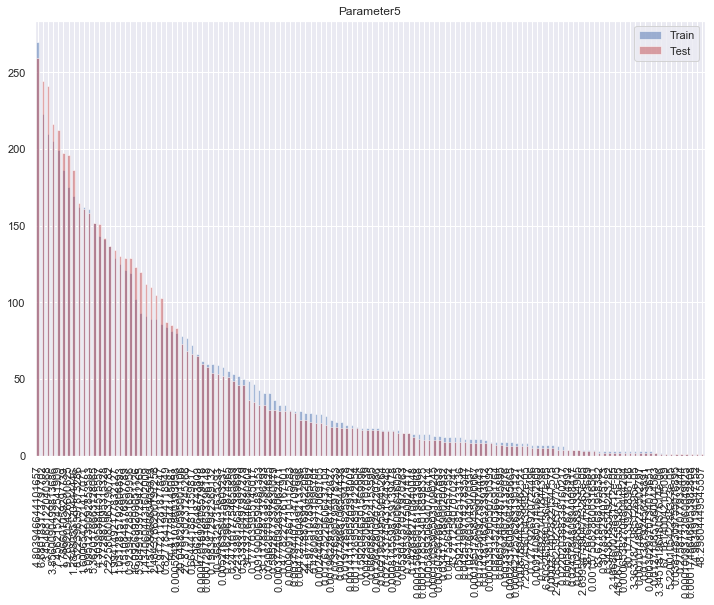

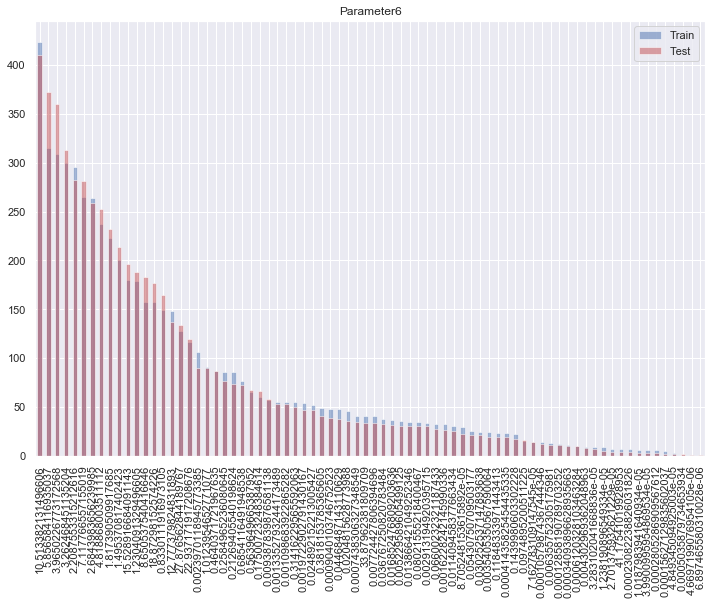

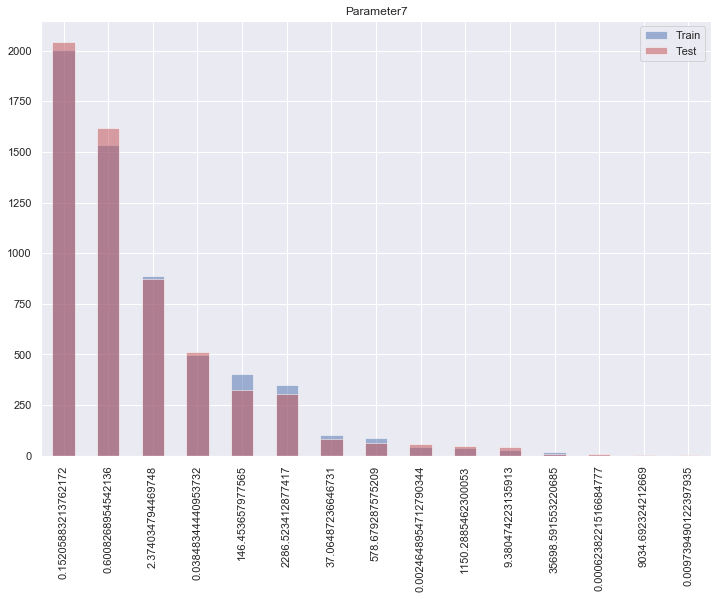

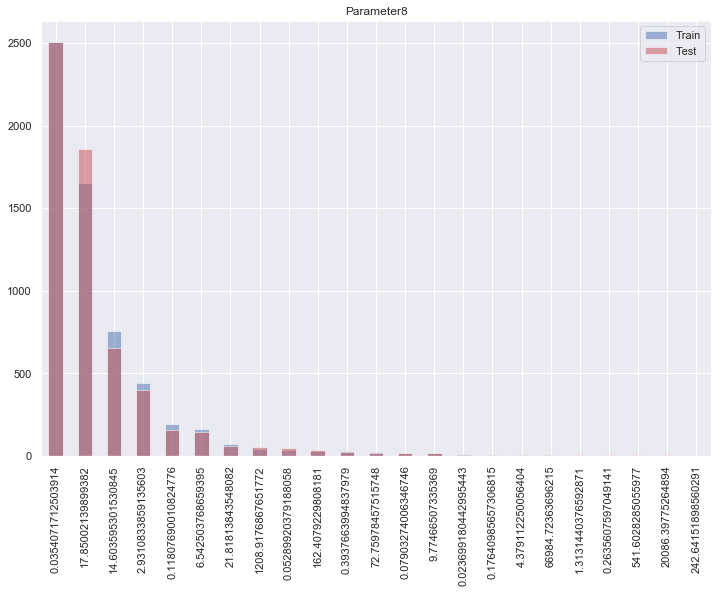

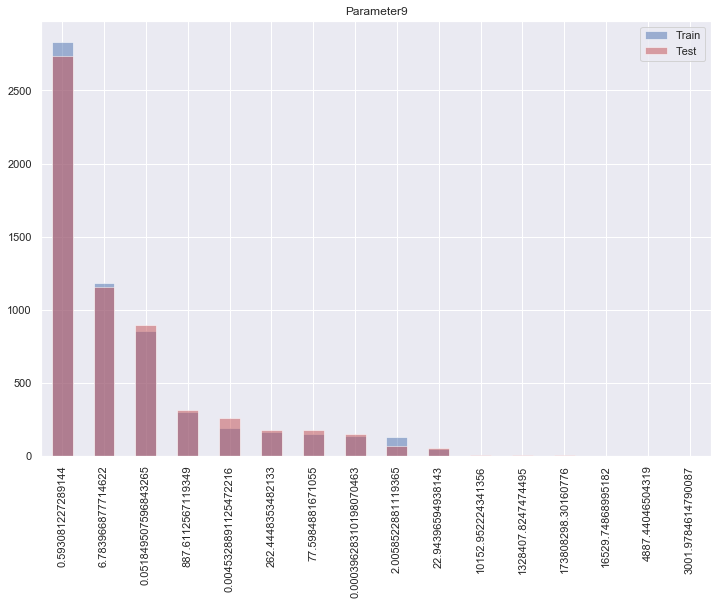

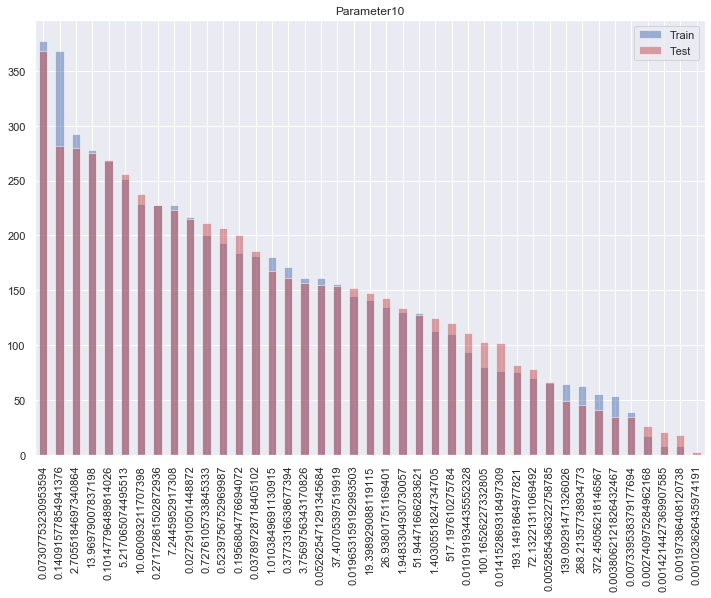

In [69]:
for i in ['Parameter'+str(i) for i in range(5,11)]:
    train[i].value_counts().plot(kind='bar',alpha=0.5, label='Train')
    test[i].value_counts().plot(kind='bar',alpha=0.5,color='r', label='Test')
    plt.title(i)
    plt.legend()
    plt.show()

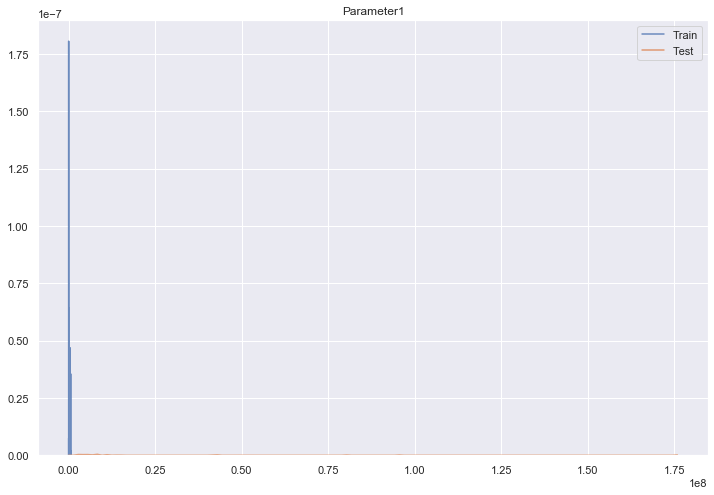

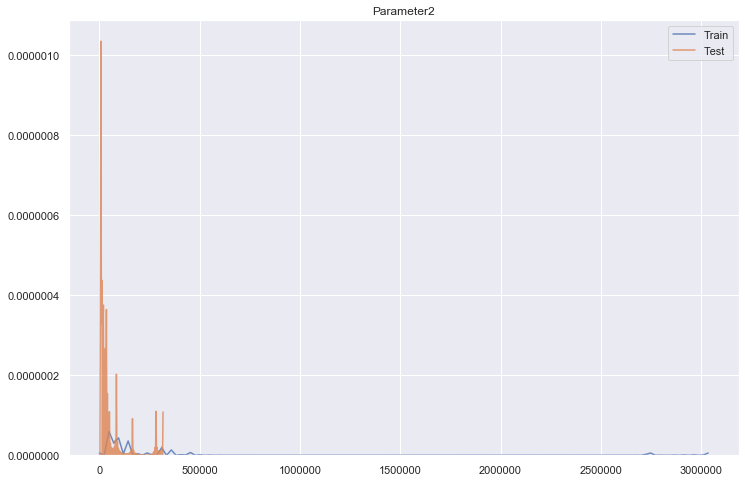

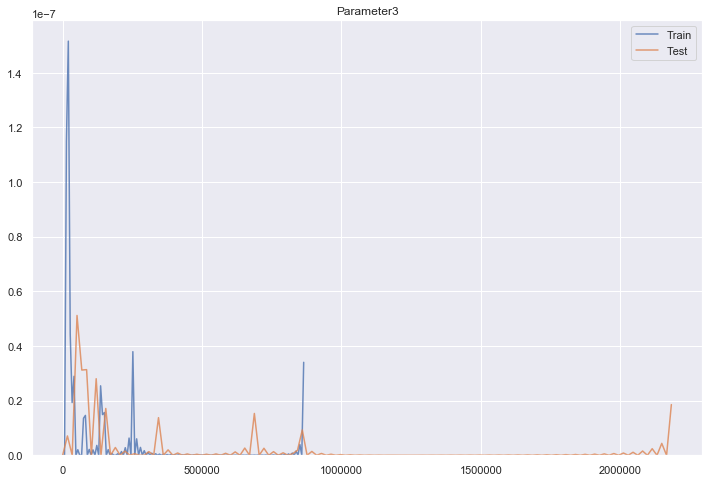

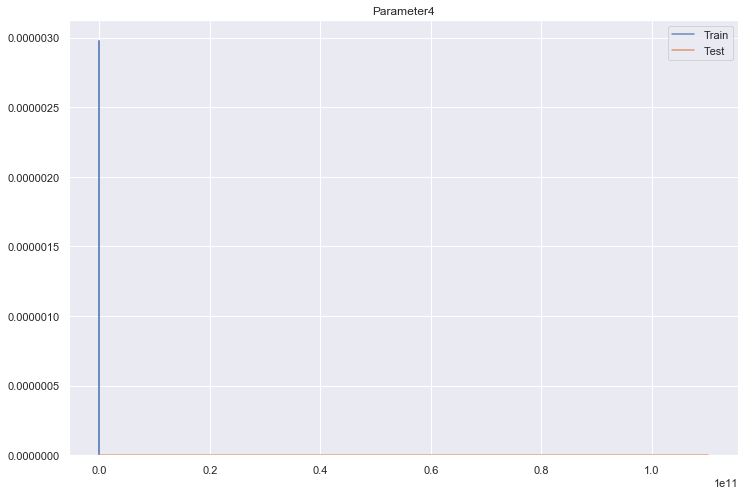

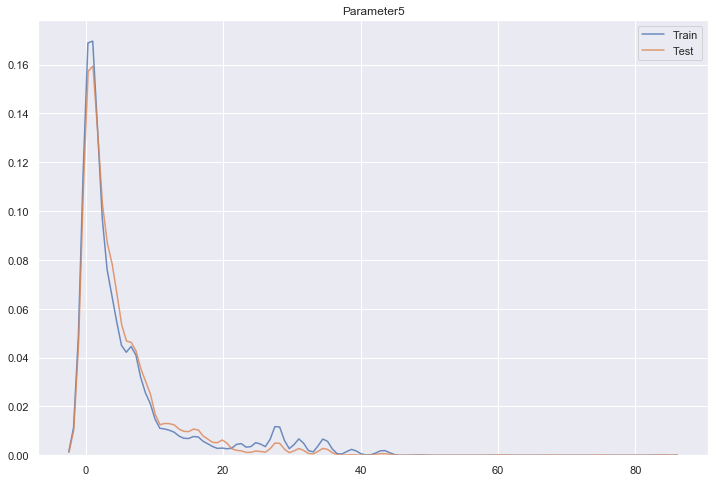

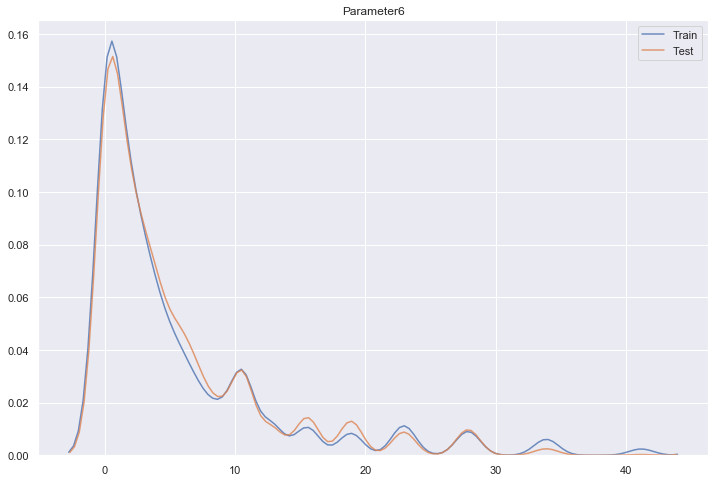

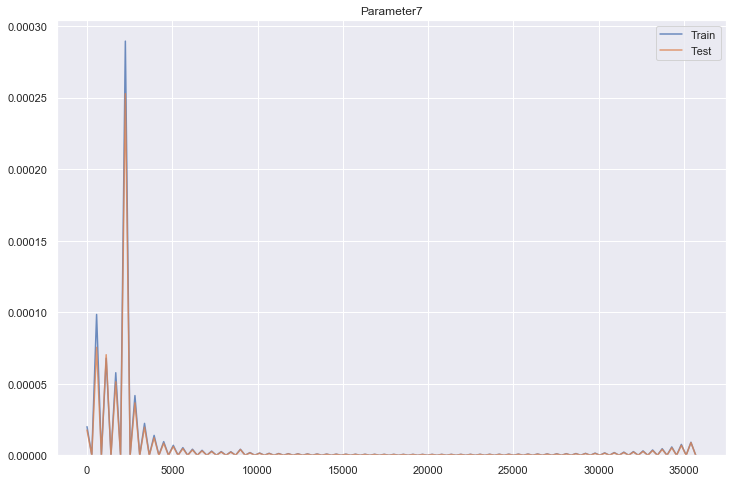

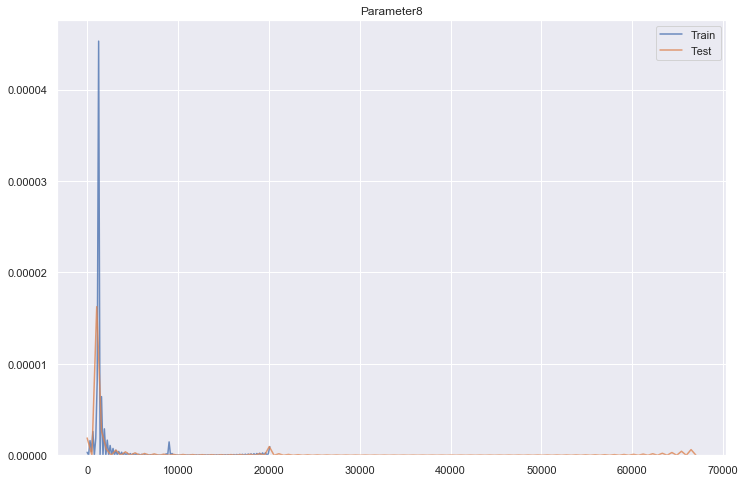

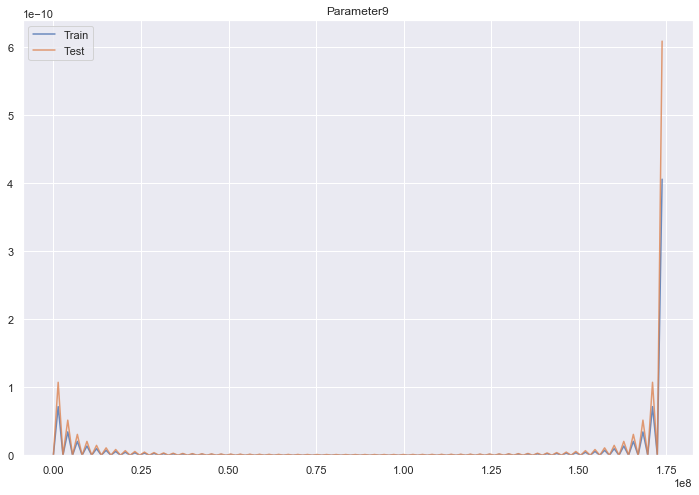

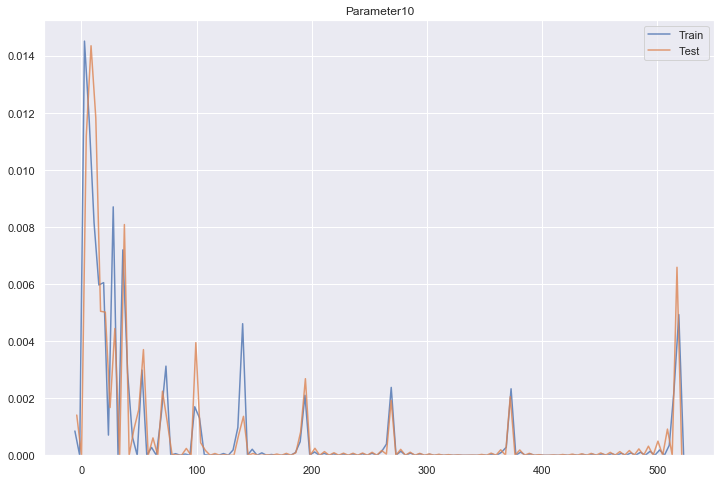

In [33]:
for i in ['Parameter'+str(i) for i in range(1,11)]:
    sns.kdeplot(train[i], label='Train',alpha=0.8)
    sns.kdeplot(test[i], label='Test',alpha=0.8)
    plt.title(i)
    plt.show()

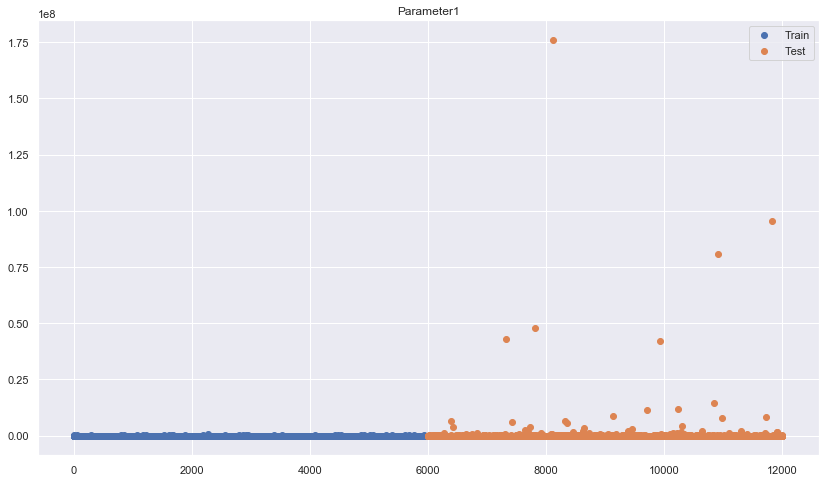

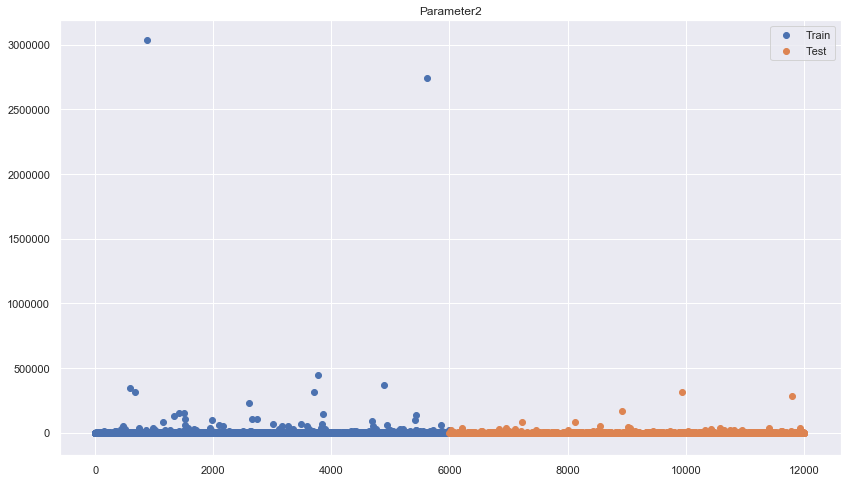

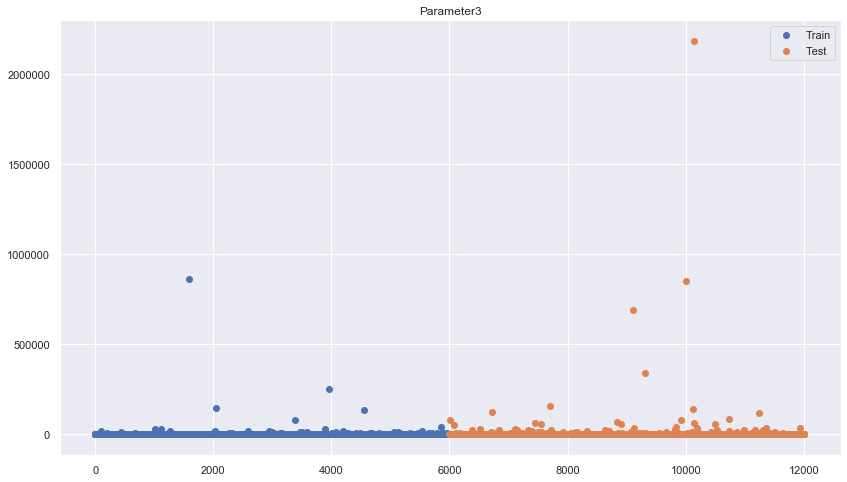

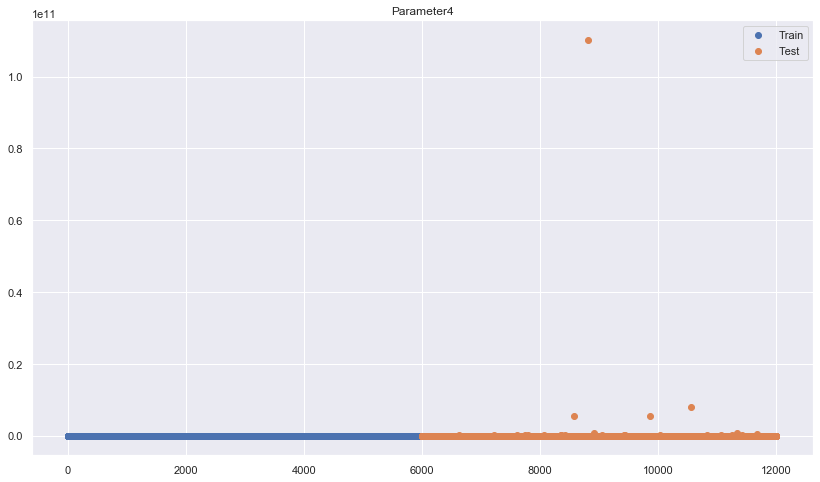

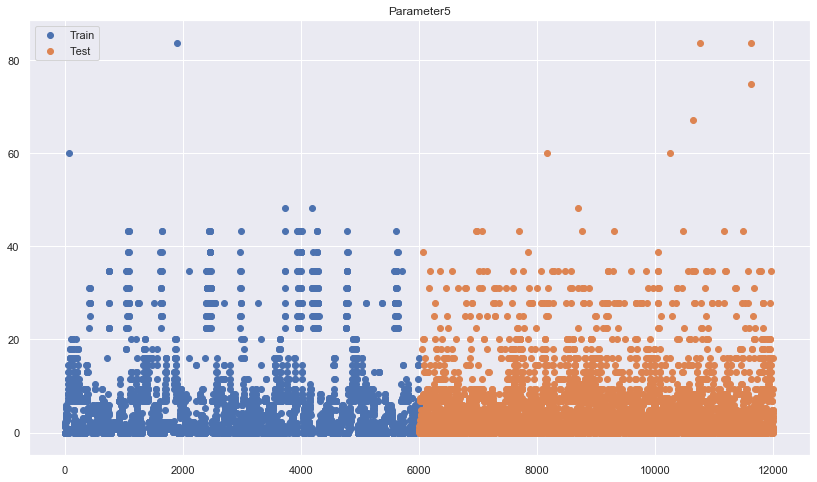

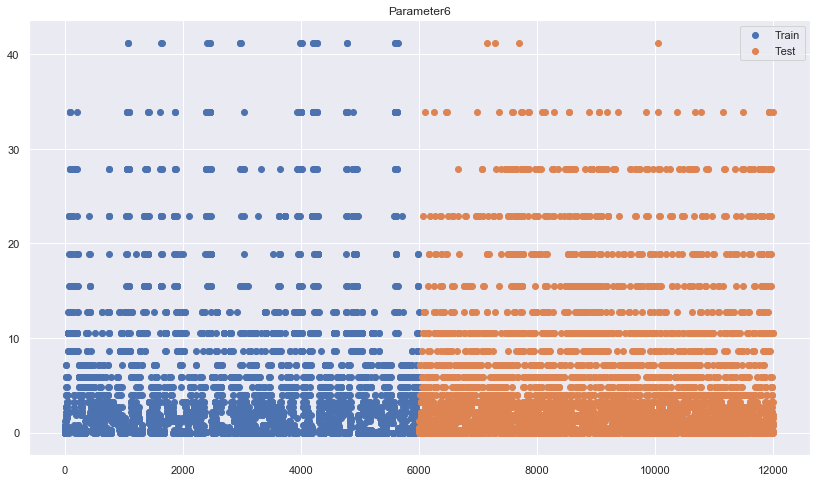

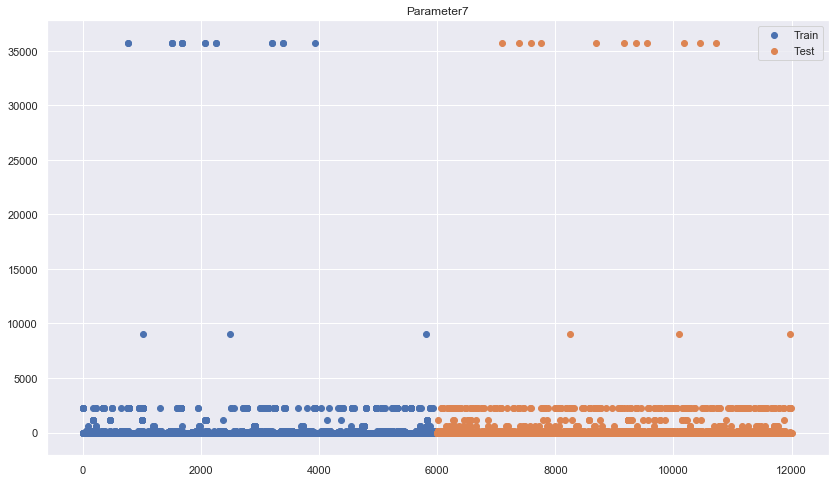

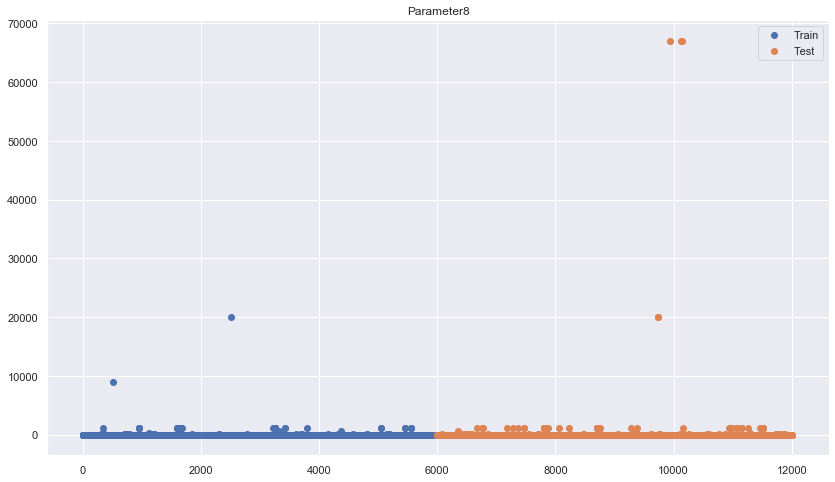

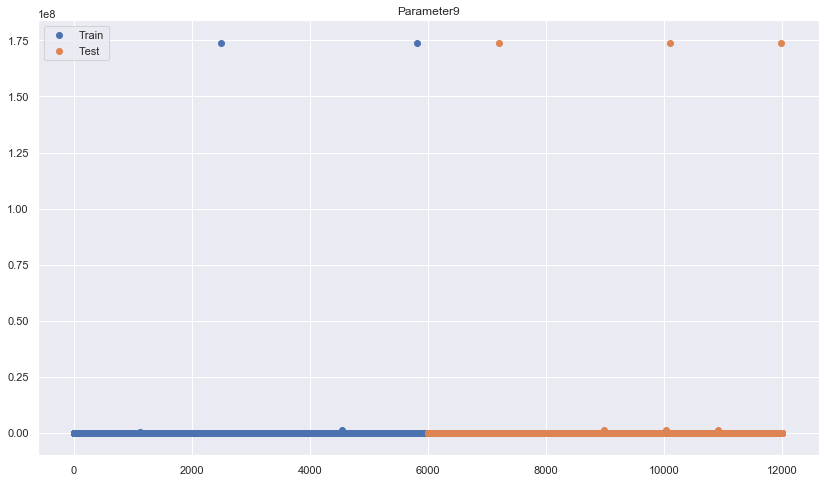

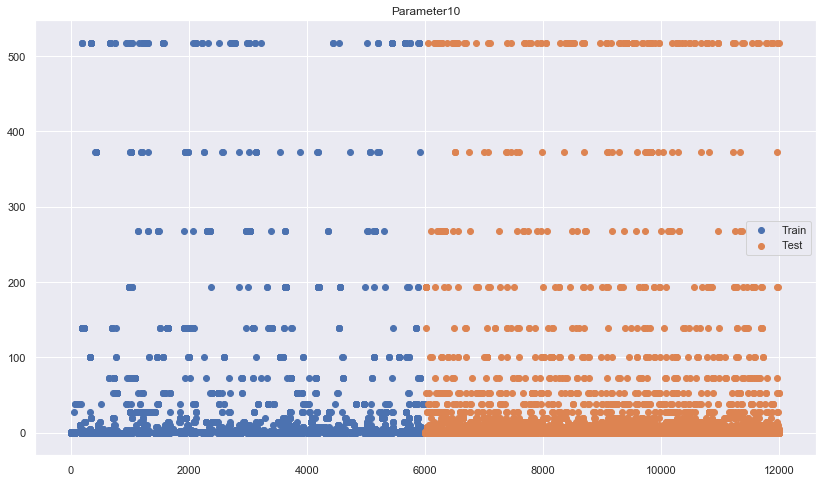

In [78]:
for i in ['Parameter'+str(i) for i in range(1,11)]:
    plt.figure(figsize=(14,8))
    plt.scatter(x=range(len(train)), y=train[i], label='Train')
    plt.scatter(x=range(len(test),len(test)*2), y=test[i], label='Test')
    plt.title(i)
    plt.legend()
    plt.show()

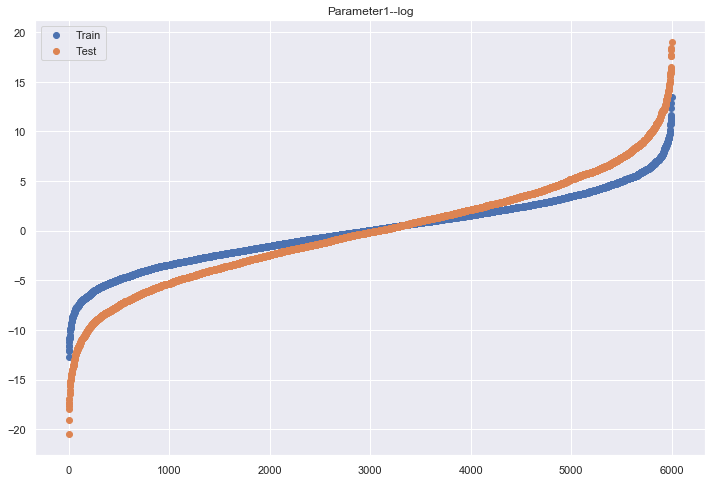

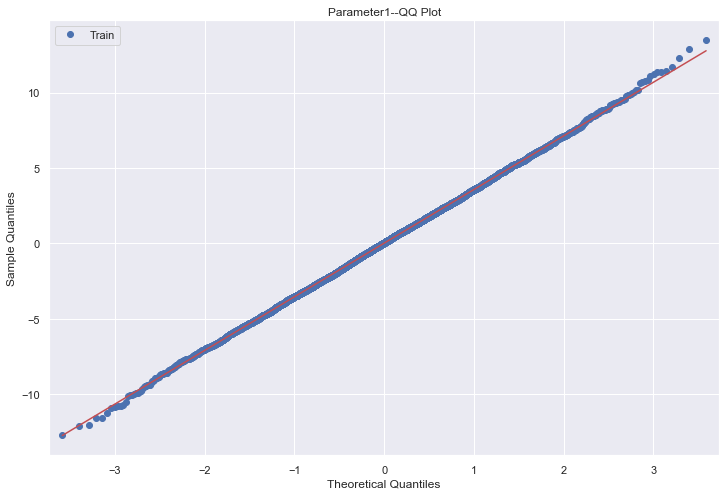

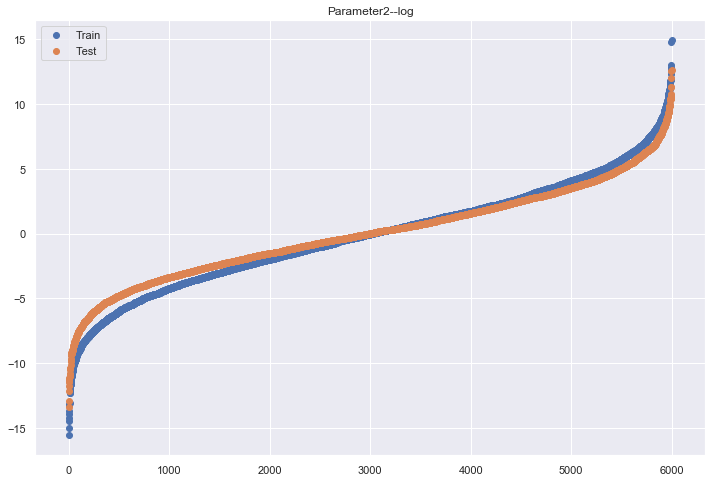

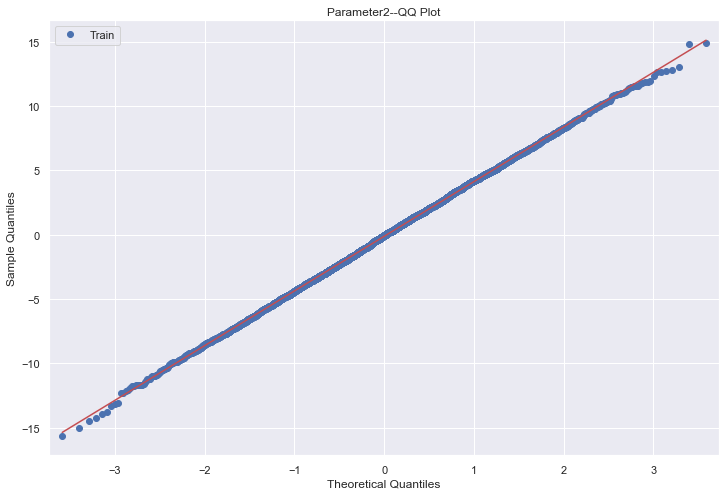

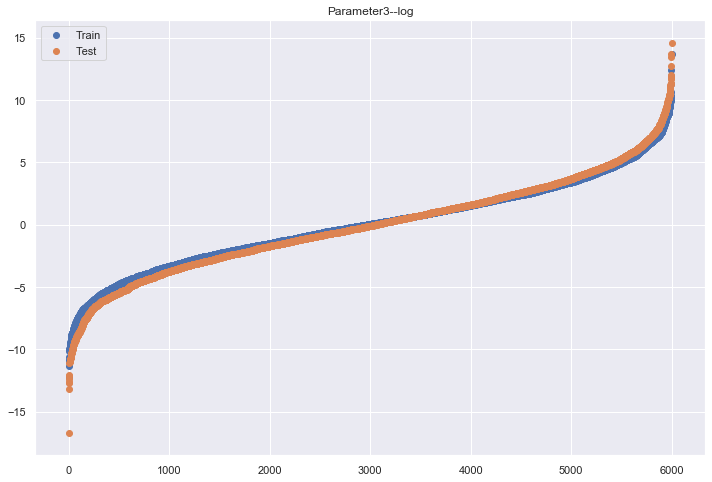

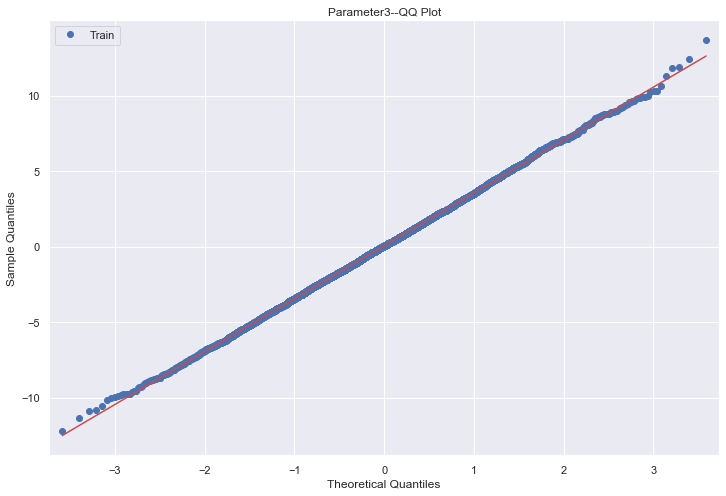

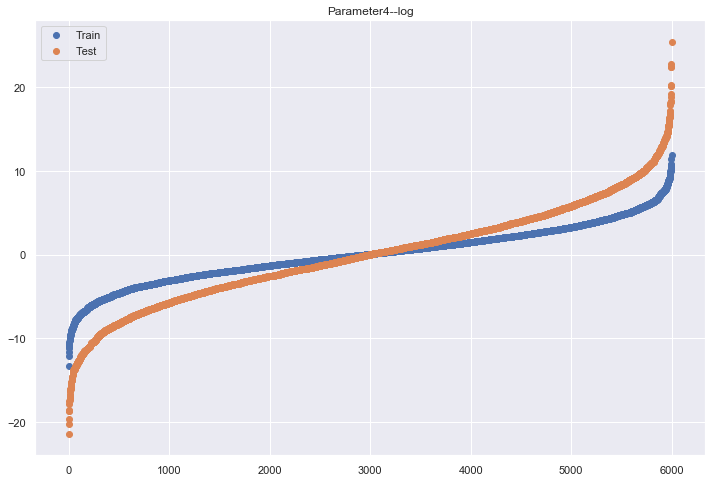

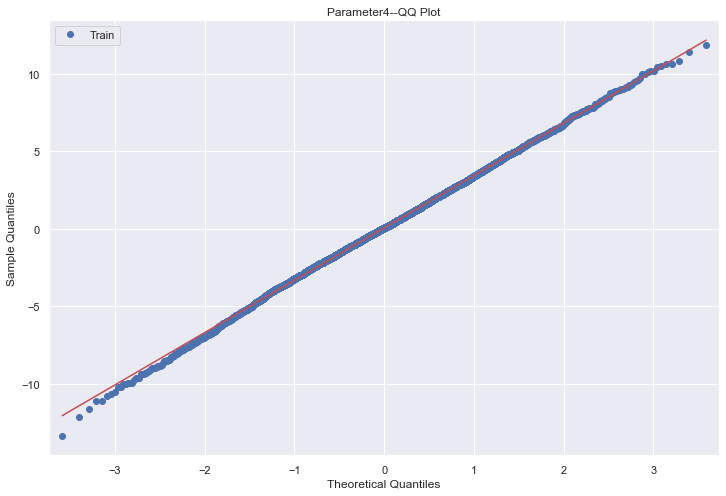

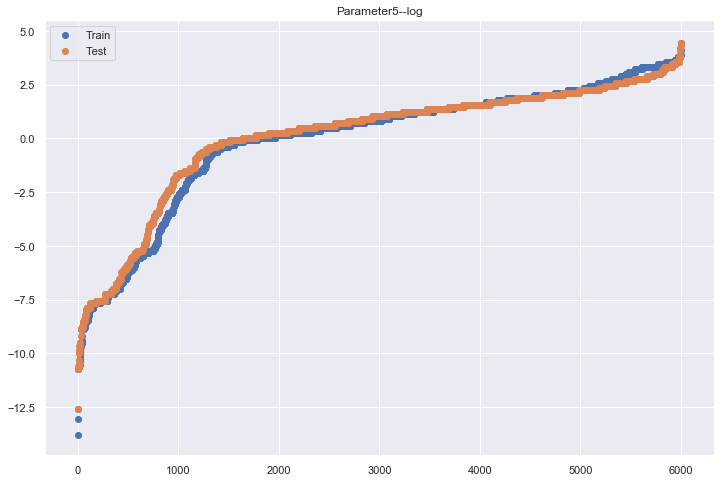

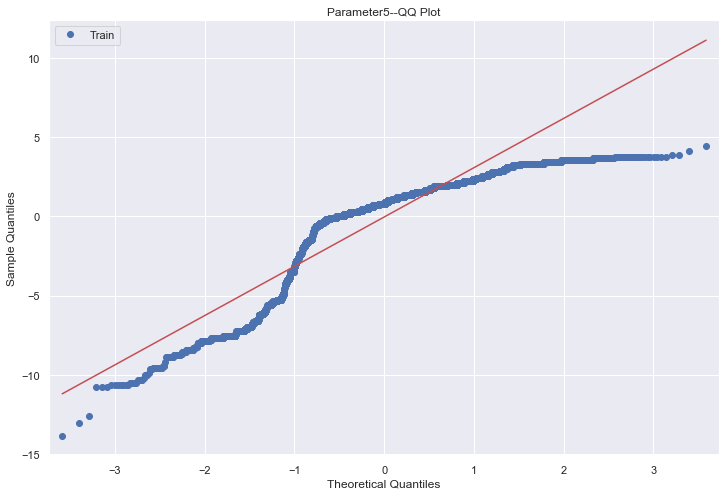

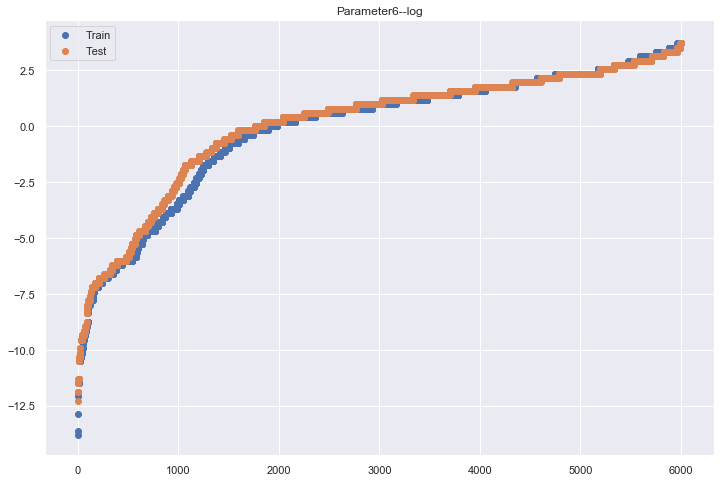

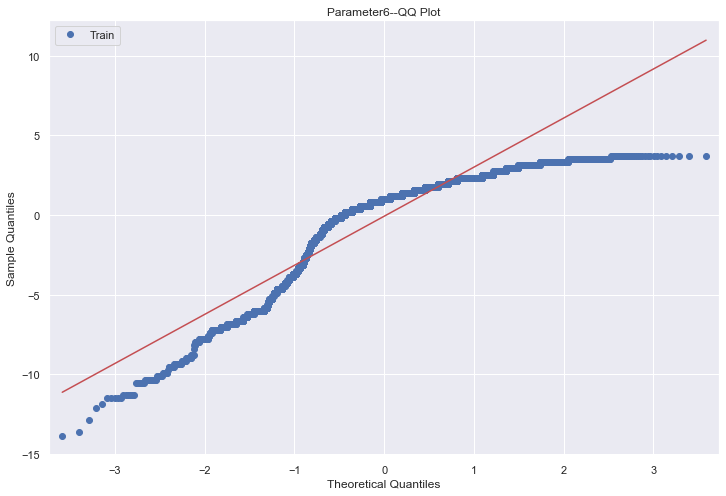

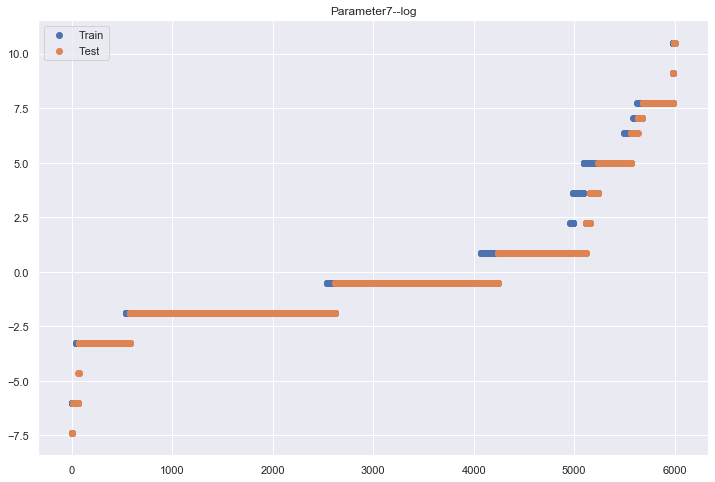

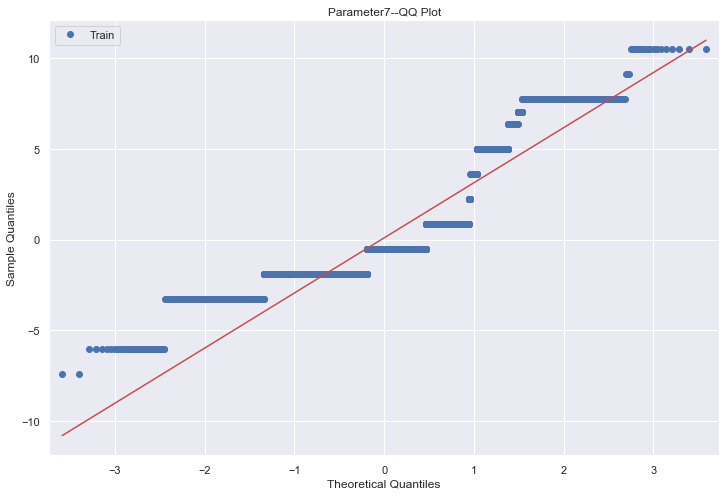

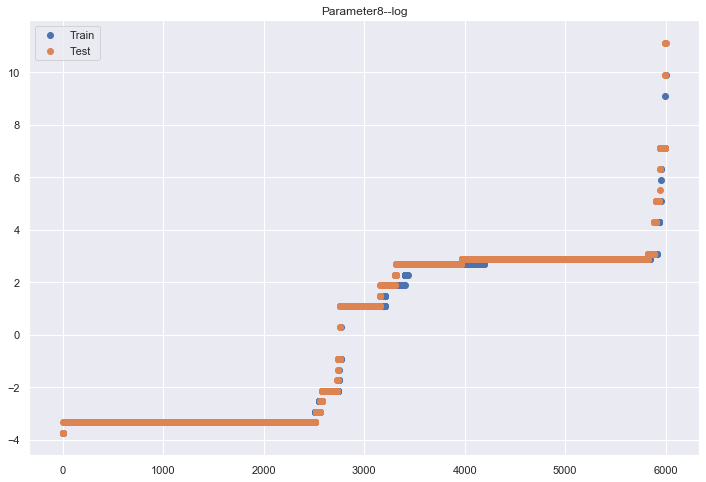

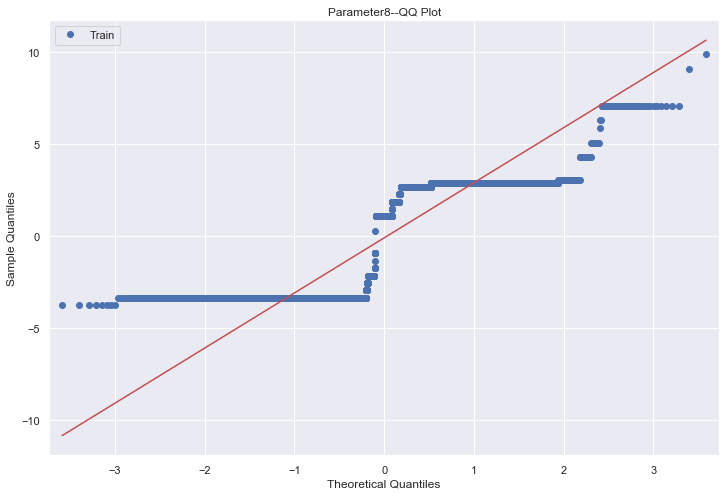

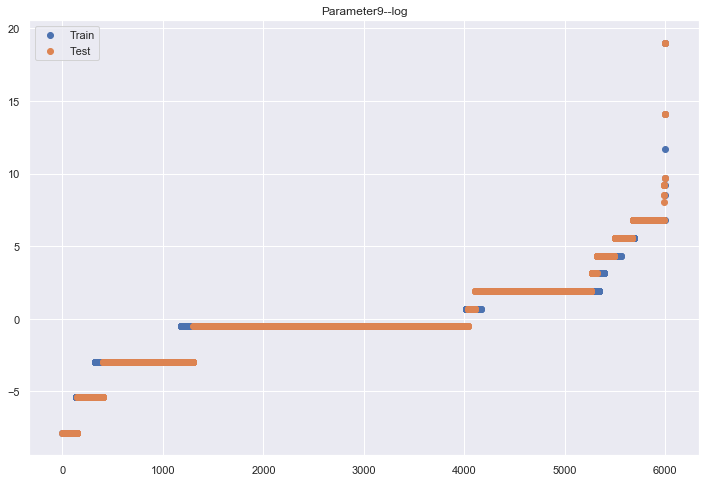

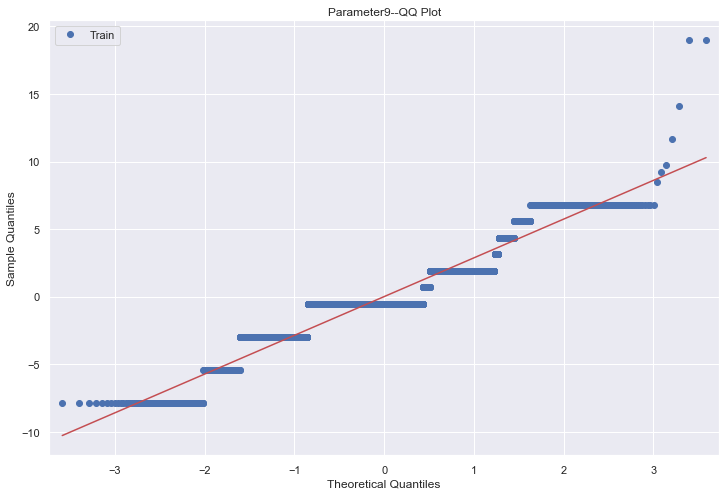

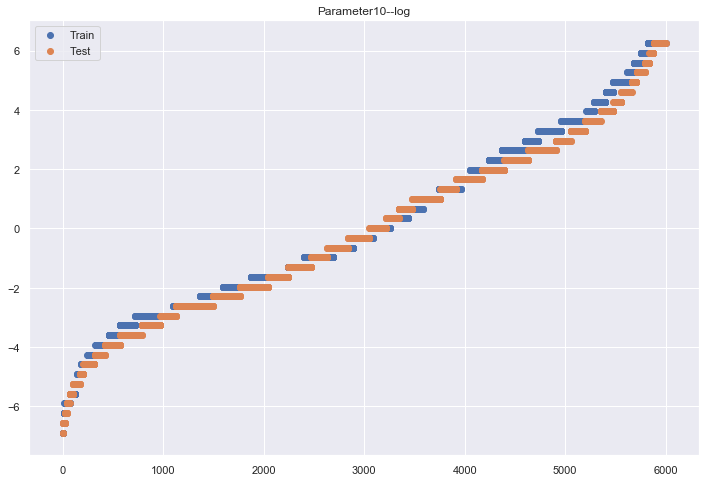

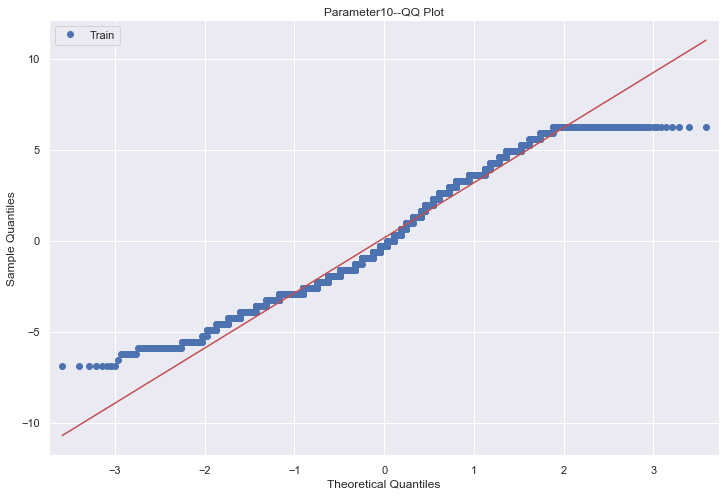

In [74]:
for i in ['Parameter'+str(i) for i in range(1,11)]:
    plt.scatter(x=range(len(train)), y=sorted(np.log(train[i])), label='Train')
    plt.scatter(x=range(len(test)), y=sorted(np.log(test[i])), label='Test')
    plt.title(i+'--log')
    plt.legend()
    plt.show()
    
    sm.qqplot(np.log(train[i]), line='s', label='Train')
    plt.legend()
    plt.title(i+'--QQ Plot')
    plt.show()